In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import constants as C

%matplotlib widget

In [2]:
model1 = edl.ProtonLPB(5e-1, 5, 5, 5, 5)
model2 = edl.ProtonLPB(5e-1, 10, 10, 10, 10)
model3 = edl.ProtonLPB(5e-1, 15, 15, 15, 15)

model1b = edl.ProtonLPB(1e-1, 0, 0, 0, 0, eps_r_opt=C.EPS_R_WATER)

In [3]:
p_h = np.linspace(1, 13, 500)
# todo: try to simplify BC for only alkaline
sweep_sol1 = model1.ph_sweep(p_h, tol=1e-2)
sweep_sol2 = model2.ph_sweep(p_h, tol=1e-2)
sweep_sol3 = model3.ph_sweep(p_h, tol=1e-2)
sweep_sol1b = model1b.ph_sweep(p_h, tol=1e-2)

Sweep from pH 2.01 to 1.00. Maximum relative residual: 1.13934e-10.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 4.88339e-06.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 1.27109e-10.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 6.50594e-06.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 1.24345e-10.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 8.35867e-06.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 2.80263e-11.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 1.92509e-05.


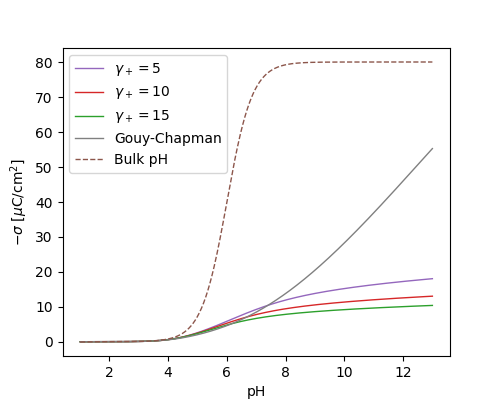

In [4]:
plt.close()
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol1.charge*1e2, color='tab:purple', label=rf'$\gamma_+=${model1.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, -sweep_sol2.charge*1e2, color='tab:red', label=rf'$\gamma_+=${model2.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, -sweep_sol3.charge*1e2, color='tab:green', label=rf'$\gamma_+=${model3.gammas[2,0]:.0f}', linewidth=1)

ax.plot(p_h, -sweep_sol1b.charge*1e2, color='gray', label=rf'Gouy-Chapman', linewidth=1)

c_h = 10 ** (-p_h)
sigma = C.E_0 * C.N_SITES_SILICA \
            * (c_h**2 - C.K_SILICA_A * C.K_SILICA_B) \
            / (C.K_SILICA_A * C.K_SILICA_B + C.K_SILICA_B * c_h + c_h**2)
ax.plot(p_h, -sigma * 1e2, '--', color='tab:brown', label='Bulk pH', linewidth=1)

ax.set_ylabel(r'$-\sigma$ [$\mu$C/cm$^2$]')
# ax.set_ylabel(r'$f$')
ax.set_xlabel('pH')

ax.legend()

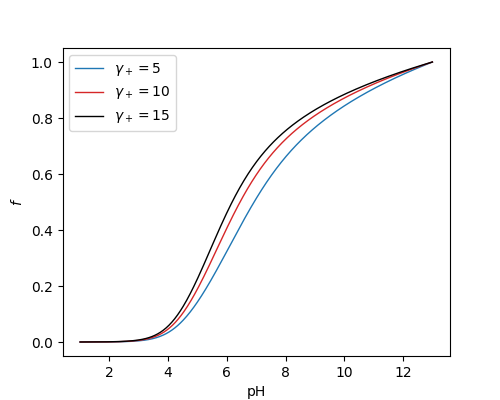

In [5]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, sweep_sol1.charge/sweep_sol1.charge[-1], color='tab:blue', label=rf'$\gamma_+=${model1.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, sweep_sol2.charge/sweep_sol2.charge[-1], color='tab:red', label=rf'$\gamma_+=${model2.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, sweep_sol3.charge/sweep_sol3.charge[-1], color='black', label=rf'$\gamma_+=${model3.gammas[2,0]:.0f}', linewidth=1)

# ax.set_ylabel(r'$-\sigma$ [$\mu$C/cm$^2$]')
ax.set_ylabel(r'$f$')
ax.set_xlabel('pH')

ax.legend()

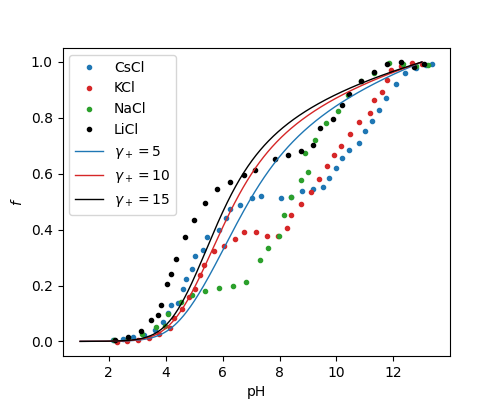

In [6]:
import pandas as pd

data1 = pd.read_table('data/azam2012-f/0.5M CsCl.csv', delimiter=';', decimal=',', header=None)
data2 = pd.read_table('data/azam2012-f/0.5M KCl.csv', delimiter=';', decimal=',', header=None)
data2b = pd.read_table('data/azam2012-f/0.5M NaCl.csv', delimiter=';', decimal=',', header=None)
data3 = pd.read_table('data/azam2012-f/0.5M LiCl.csv', delimiter=';', decimal=',', header=None)

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(data1[0], data1[1], '.', color='tab:blue', label=rf'CsCl', linewidth=1)
ax.plot(data2[0], data2[1], '.', color='tab:red', label=rf'KCl', linewidth=1)
ax.plot(data2b[0], data2b[1], '.', color='tab:green', label=rf'NaCl', linewidth=1)
ax.plot(data3[0], data3[1], '.', color='black', label=rf'LiCl', linewidth=1)

ax.plot(p_h, sweep_sol1.charge/sweep_sol1.charge[-1], color='tab:blue', label=rf'$\gamma_+=${model1.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, sweep_sol2.charge/sweep_sol2.charge[-1], color='tab:red', label=rf'$\gamma_+=${model2.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, sweep_sol3.charge/sweep_sol3.charge[-1], color='black', label=rf'$\gamma_+=${model3.gammas[2,0]:.0f}', linewidth=1)

ax.set_ylabel(r'$f$')
ax.set_xlabel('pH')

ax.legend()

In [7]:
model1 = edl.ProtonLPB(1e-1, 10, 1, 1, 1)
model2 = edl.ProtonLPB(1e-2, 10, 1, 1, 1)
sweep_sol1 = model1.ph_sweep(p_h, tol=1e-2)
sweep_sol2 = model2.ph_sweep(p_h, tol=1e-2)

Sweep from pH 2.01 to 1.00. Maximum relative residual: 5.83383e-10.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 3.67322e-06.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 8.74208e-11.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 2.71873e-06.


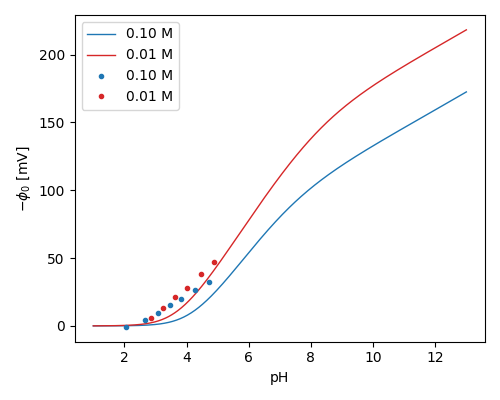

In [8]:
fig, ax = plt.subplots(figsize=(5,4))

data1 = pd.read_table('data/bousse1983-phi0/0.1M.csv', delimiter=';', decimal=',', header=None)
data2 = pd.read_table('data/bousse1983-phi0/0.01M.csv', delimiter=';', decimal=',', header=None)

ax.plot(p_h, -sweep_sol1.phi * 1e3, color='tab:blue', label=rf'{1e-1:.2f} M', linewidth=1)
ax.plot(p_h, -sweep_sol2.phi * 1e3, color='tab:red', label=rf'{1e-2:.2f} M', linewidth=1)

ax.plot(data1[1], data1[0], '.', color='tab:blue', label=rf'{1e-1:.2f} M', linewidth=1)
ax.plot(data2[1], data2[0], '.', color='tab:red', label=rf'{1e-2} M', linewidth=1)

# ax.set_ylim([-5, 150])
# ax.set_xlim([1, 7])
ax.set_ylabel(r'$-\phi_0$ [mV]')
ax.set_xlabel('pH')
ax.legend()
plt.tight_layout()

In [13]:
model0 = edl.ProtonLPB(2e-1, 0, 0, 0, 0, eps_r_opt=C.EPS_R_WATER)
model1 = edl.ProtonLPB(2e-1, 5, 1, 1, 1)
model2 = edl.ProtonLPB(2e-1, 10, 1, 1, 1)
sweep_sol0 = model0.ph_sweep(p_h, tol=1e-2)
sweep_sol1 = model1.ph_sweep(p_h, tol=1e-2)
sweep_sol2 = model2.ph_sweep(p_h, tol=1e-2)

Sweep from pH 2.01 to 1.00. Maximum relative residual: 1.98768e-11.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 1.91677e-05.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 5.43798e-10.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 3.59547e-06.
Sweep from pH 2.01 to 1.00. Maximum relative residual: 1.23734e-09.
Sweep from pH 2.01 to 13.00. Maximum relative residual: 4.26003e-06.


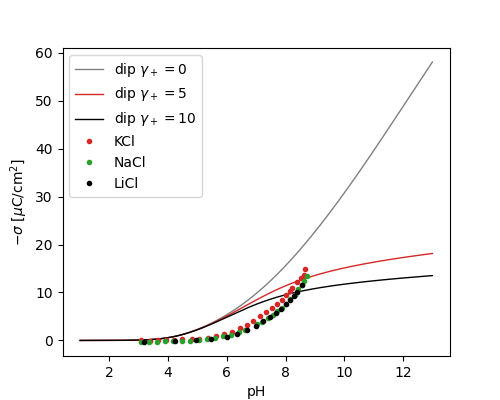

In [14]:
data1 = pd.read_table('data/dove2005-sigma0/0.20M KCl.csv', delimiter=';', decimal=',', header=None)
data1b = pd.read_table('data/dove2005-sigma0/0.20M NaCl.csv', delimiter=';', decimal=',', header=None)
data2 = pd.read_table('data/dove2005-sigma0/0.20M LiCl.csv', delimiter=';', decimal=',', header=None)

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol0.charge*1e2, color='gray', label=rf'dip $\gamma_+=${model0.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, -sweep_sol1.charge*1e2, color='tab:red', label=rf'dip $\gamma_+=${model1.gammas[2,0]:.0f}', linewidth=1)
ax.plot(p_h, -sweep_sol2.charge*1e2, color='black', label=rf'dip $\gamma_+=${model2.gammas[2,0]:.0f}', linewidth=1)

ax.plot(data1[1], -data1[0].to_numpy() * 1e2, '.', color='tab:red', label=rf'KCl', linewidth=1)
ax.plot(data1b[1], -data1b[0].to_numpy() * 1e2, '.', color='tab:green', label=rf'NaCl', linewidth=1)
ax.plot(data2[1], -data2[0].to_numpy() * 1e2, '.', color='black', label=rf'LiCl', linewidth=1)

ax.set_ylabel(r'$-\sigma$ [$\mu$C/cm$^2$]')
# ax.set_ylabel(r'$f$')
ax.set_xlabel('pH')

ax.legend()